In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import pymongo
from pymongo import MongoClient
from pprint import pprint 
import hvplot.pandas
import holoviews as hv
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt 

In [2]:
mongo = MongoClient(port=27017)

In [3]:
print(mongo.list_database_names())

['Homework1', 'Project_3', 'Project_4', 'admin', 'classDB', 'config', 'fruits_db', 'local', 'met', 'petsitly_marketing', 'uk_food']


In [4]:
db = mongo['Project_4']

In [5]:
print(db.list_collection_names())

['Housing']


In [6]:
Housing = db['Housing']

In [7]:
pprint(db.Housing.find_one())

{'': 0,
 'Land Use': 'RESIDENTIAL CONDO',
 'Property Address': '1208  3RD AVE S',
 'Property City': 'NASHVILLE',
 'Sale Date': '1/24/13',
 'Sale Price': 132000,
 'Suite/ Condo   #': 8,
 '_id': ObjectId('65d7ef0b234a25443081519f')}


In [8]:
collection = db.Housing

result = collection.find()

# Convert the result to a list of dictionaries
data_list = [d for d in result]

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data_list)

In [9]:
df

,_id,,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
0,65d7ef0b234a25443081519f,0,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,1/24/13,132000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65d7ef0b234a2544308151a0,1,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/13,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,2.0,1.0,0.0
2,65d7ef0b234a2544308151a1,2,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/13,202000,0.11,34000.0,157800.0,191800.0,2090.82495,2000.0,3.0,2.0,1.0
3,65d7ef0b234a2544308151a2,3,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/13,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,4.0,2.0,0.0
4,65d7ef0b234a2544308151a3,4,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/13,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,65d7ef0e234a254430822ed6,56631,RESIDENTIAL CONDO,320 11TH AVE S,274,NASHVILLE,10/6/16,210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56632,65d7ef0e234a254430822ed7,56632,RESIDENTIAL CONDO,700 12TH AVE S,608,NASHVILLE,10/25/16,338000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56633,65d7ef0e234a254430822ed8,56633,RESIDENTIAL CONDO,700 12TH AVE S,613,NASHVILLE,10/4/16,742000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56634,65d7ef0e234a254430822ed9,56634,RESIDENTIAL CONDO,700 12TH AVE S,708,NASHVILLE,10/26/16,320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.drop(columns=['Suite/ Condo   #','Property Address'])

In [11]:
cleaned_df = df.dropna()

cleaned_df

,_id,,Land Use,Property City,Sale Date,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
1,65d7ef0b234a2544308151a0,1,SINGLE FAMILY,NASHVILLE,1/11/13,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,2.0,1.0,0.0
2,65d7ef0b234a2544308151a1,2,SINGLE FAMILY,NASHVILLE,1/18/13,202000,0.11,34000.0,157800.0,191800.0,2090.82495,2000.0,3.0,2.0,1.0
3,65d7ef0b234a2544308151a2,3,SINGLE FAMILY,NASHVILLE,1/18/13,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,4.0,2.0,0.0
4,65d7ef0b234a2544308151a3,4,SINGLE FAMILY,NASHVILLE,1/23/13,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,2.0,1.0,0.0
5,65d7ef0b234a2544308151a4,5,SINGLE FAMILY,NASHVILLE,1/4/13,93736,0.17,25000.0,86100.0,113300.0,1037.00000,1945.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,65d7ef0e234a254430822ebc,56605,SINGLE FAMILY,ANTIOCH,10/26/16,214000,0.27,25000.0,142400.0,167400.0,2421.00000,1996.0,3.0,3.0,0.0
56607,65d7ef0e234a254430822ebe,56607,SINGLE FAMILY,ANTIOCH,10/28/16,236000,0.23,25000.0,159300.0,184300.0,3117.00000,1995.0,3.0,3.0,0.0
56614,65d7ef0e234a254430822ec5,56614,SINGLE FAMILY,NASHVILLE,10/28/16,466000,0.15,40000.0,204100.0,256000.0,1637.00000,2004.0,3.0,2.0,1.0
56615,65d7ef0e234a254430822ec6,56615,SINGLE FAMILY,NASHVILLE,10/26/16,685000,0.19,40000.0,295900.0,351600.0,2478.00000,2005.0,4.0,3.0,1.0


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
X = cleaned_df["Finished Area"]
X.shape

(24012,)

In [14]:
X = cleaned_df["Finished Area"].values.reshape(-1, 1)

X[:5]

array([[1149.     ],
       [2090.82495],
       [2145.60001],
       [1969.     ],
       [1037.     ]])

In [15]:
X.shape

(24012, 1)

In [16]:

y = cleaned_df["Sale Price"]

model.fit(X, y)

LinearRegression()

In [17]:
print(f"Model's slope: {model.coef_}")

Model's slope: [193.42172791]


In [18]:
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: -95434.8202867586


In [19]:
area = 2000

print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * {area}")

y_7 = model.intercept_ + model.coef_[0] * area

print(f"Predicted price for a house with {area} sq ft would be: ${y_7:.2f}")

Model's formula: y = -95434.8202867586 + 193.42172790824736 * 2000
Predicted price for a house with 2000 sq ft would be: $291408.64


In [20]:
predicted_y_values = model.predict(X)

In [21]:
df_price_prediction = cleaned_df.copy()

df_price_prediction["price_prediction"] = predicted_y_values

df_price_prediction.head()

,_id,,Land Use,Property City,Sale Date,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,price_prediction
1,65d7ef0b234a2544308151a0,1,SINGLE FAMILY,NASHVILLE,1/11/13,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,2.0,1.0,0.0,126806.745080
2,65d7ef0b234a2544308151a1,2,SINGLE FAMILY,NASHVILLE,1/18/13,202000,0.11,34000.0,157800.0,191800.0,2090.82495,2000.0,3.0,2.0,1.0,308976.154296
3,65d7ef0b234a2544308151a2,3,SINGLE FAMILY,NASHVILLE,1/18/13,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,4.0,2.0,0.0,319570.841047
4,65d7ef0b234a2544308151a3,4,SINGLE FAMILY,NASHVILLE,1/23/13,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,2.0,1.0,0.0,285412.561965
5,65d7ef0b234a2544308151a4,5,SINGLE FAMILY,NASHVILLE,1/4/13,93736,0.17,25000.0,86100.0,113300.0,1037.00000,1945.0,2.0,1.0,0.0,105143.511554


In [22]:
df_price_prediction['Sale Price'].round(decimals=0)
df_price_prediction['Finished Area'].round(decimals=0)

df_price_prediction.head()

,_id,,Land Use,Property City,Sale Date,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,price_prediction
1,65d7ef0b234a2544308151a0,1,SINGLE FAMILY,NASHVILLE,1/11/13,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,2.0,1.0,0.0,126806.745080
2,65d7ef0b234a2544308151a1,2,SINGLE FAMILY,NASHVILLE,1/18/13,202000,0.11,34000.0,157800.0,191800.0,2090.82495,2000.0,3.0,2.0,1.0,308976.154296
3,65d7ef0b234a2544308151a2,3,SINGLE FAMILY,NASHVILLE,1/18/13,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,4.0,2.0,0.0,319570.841047
4,65d7ef0b234a2544308151a3,4,SINGLE FAMILY,NASHVILLE,1/23/13,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,2.0,1.0,0.0,285412.561965
5,65d7ef0b234a2544308151a4,5,SINGLE FAMILY,NASHVILLE,1/4/13,93736,0.17,25000.0,86100.0,113300.0,1037.00000,1945.0,2.0,1.0,0.0,105143.511554


In [23]:
sub=df_price_prediction.loc[:,['Finished Area','price_prediction']]
sub.head()

,Finished Area,price_prediction
1,1149.00000,126806.745080
2,2090.82495,308976.154296
3,2145.60001,319570.841047
4,1969.00000,285412.561965
5,1037.00000,105143.511554


In [24]:
# Create a line plot of the predicted salary values
best_fit_line = sub.hvplot.line(
    x='Finished Area',
    y='price_prediction',
    color='red')
best_fit_line

:Curve   [Finished Area]   (price_prediction)

In [25]:
sub2=df_price_prediction.loc[:,['Finished Area','Sale Price']]
sub2.head()

,Finished Area,Sale Price
1,1149.00000,191500
2,2090.82495,202000
3,2145.60001,32000
4,1969.00000,102000
5,1037.00000,93736


In [26]:
# Create a scatter plot with the salary information
house_plot = sub2.hvplot.scatter(
    x="Finished Area",
    y="Sale Price",
    title="Expected price Based on area of house"
)
house_plot

:Scatter   [Finished Area]   (Sale Price)

In [27]:
house_plot * best_fit_line

:Overlay
   .Scatter.I :Scatter   [Finished Area]   (Sale Price)
   .Curve.I   :Curve   [Finished Area]   (price_prediction)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Compute the metrics for the linear regression model
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.4958312084363904.
The r2 is 0.4958312084363904.
The mean squared error is 46326783592.63489.
The root mean squared error is 215236.57587091206.
The standard deviation is 303129.4244207278.


In [30]:
cleaned_df.to_csv('cleaned_data.csv', index=False)

In [31]:
machine_learning = cleaned_df.copy()
machine_learning.head()

,_id,,Land Use,Property City,Sale Date,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
1,65d7ef0b234a2544308151a0,1,SINGLE FAMILY,NASHVILLE,1/11/13,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,2.0,1.0,0.0
2,65d7ef0b234a2544308151a1,2,SINGLE FAMILY,NASHVILLE,1/18/13,202000,0.11,34000.0,157800.0,191800.0,2090.82495,2000.0,3.0,2.0,1.0
3,65d7ef0b234a2544308151a2,3,SINGLE FAMILY,NASHVILLE,1/18/13,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,4.0,2.0,0.0
4,65d7ef0b234a2544308151a3,4,SINGLE FAMILY,NASHVILLE,1/23/13,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,2.0,1.0,0.0
5,65d7ef0b234a2544308151a4,5,SINGLE FAMILY,NASHVILLE,1/4/13,93736,0.17,25000.0,86100.0,113300.0,1037.00000,1945.0,2.0,1.0,0.0


In [32]:
machine_learning.head()

,_id,,Land Use,Property City,Sale Date,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
1,65d7ef0b234a2544308151a0,1,SINGLE FAMILY,NASHVILLE,1/11/13,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,2.0,1.0,0.0
2,65d7ef0b234a2544308151a1,2,SINGLE FAMILY,NASHVILLE,1/18/13,202000,0.11,34000.0,157800.0,191800.0,2090.82495,2000.0,3.0,2.0,1.0
3,65d7ef0b234a2544308151a2,3,SINGLE FAMILY,NASHVILLE,1/18/13,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,4.0,2.0,0.0
4,65d7ef0b234a2544308151a3,4,SINGLE FAMILY,NASHVILLE,1/23/13,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,2.0,1.0,0.0
5,65d7ef0b234a2544308151a4,5,SINGLE FAMILY,NASHVILLE,1/4/13,93736,0.17,25000.0,86100.0,113300.0,1037.00000,1945.0,2.0,1.0,0.0


In [33]:
machine_learning['Sale Year'] = pd.to_datetime(machine_learning['Sale Date'])
machine_learning['Sale Date'] = pd.to_datetime(machine_learning['Sale Date'])
# Extract the year from the date_column
machine_learning['Sale Year'] = machine_learning['Sale Date'].dt.year
machine_learning.head()

,_id,,Land Use,Property City,Sale Date,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Sale Year
1,65d7ef0b234a2544308151a0,1,SINGLE FAMILY,NASHVILLE,2013-01-11,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,2.0,1.0,0.0,2013
2,65d7ef0b234a2544308151a1,2,SINGLE FAMILY,NASHVILLE,2013-01-18,202000,0.11,34000.0,157800.0,191800.0,2090.82495,2000.0,3.0,2.0,1.0,2013
3,65d7ef0b234a2544308151a2,3,SINGLE FAMILY,NASHVILLE,2013-01-18,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,4.0,2.0,0.0,2013
4,65d7ef0b234a2544308151a3,4,SINGLE FAMILY,NASHVILLE,2013-01-23,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,2.0,1.0,0.0,2013
5,65d7ef0b234a2544308151a4,5,SINGLE FAMILY,NASHVILLE,2013-01-04,93736,0.17,25000.0,86100.0,113300.0,1037.00000,1945.0,2.0,1.0,0.0,2013


In [34]:
machine_learning.drop(columns=['Sale Date'])


,_id,,Land Use,Property City,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Sale Year
1,65d7ef0b234a2544308151a0,1,SINGLE FAMILY,NASHVILLE,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,2.0,1.0,0.0,2013
2,65d7ef0b234a2544308151a1,2,SINGLE FAMILY,NASHVILLE,202000,0.11,34000.0,157800.0,191800.0,2090.82495,2000.0,3.0,2.0,1.0,2013
3,65d7ef0b234a2544308151a2,3,SINGLE FAMILY,NASHVILLE,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,4.0,2.0,0.0,2013
4,65d7ef0b234a2544308151a3,4,SINGLE FAMILY,NASHVILLE,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,2.0,1.0,0.0,2013
5,65d7ef0b234a2544308151a4,5,SINGLE FAMILY,NASHVILLE,93736,0.17,25000.0,86100.0,113300.0,1037.00000,1945.0,2.0,1.0,0.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,65d7ef0e234a254430822ebc,56605,SINGLE FAMILY,ANTIOCH,214000,0.27,25000.0,142400.0,167400.0,2421.00000,1996.0,3.0,3.0,0.0,2016
56607,65d7ef0e234a254430822ebe,56607,SINGLE FAMILY,ANTIOCH,236000,0.23,25000.0,159300.0,184300.0,3117.00000,1995.0,3.0,3.0,0.0,2016
56614,65d7ef0e234a254430822ec5,56614,SINGLE FAMILY,NASHVILLE,466000,0.15,40000.0,204100.0,256000.0,1637.00000,2004.0,3.0,2.0,1.0,2016
56615,65d7ef0e234a254430822ec6,56615,SINGLE FAMILY,NASHVILLE,685000,0.19,40000.0,295900.0,351600.0,2478.00000,2005.0,4.0,3.0,1.0,2016


In [35]:
columns_to_encode = ['Land Use', 'Property City']

# Apply get_dummies() to the specified columns
df_encoded = pd.get_dummies(machine_learning, columns=columns_to_encode)

df_encoded.head()

,_id,,Sale Date,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,...,Property City_ANTIOCH,Property City_BRENTWOOD,Property City_GOODLETTSVILLE,Property City_HERMITAGE,Property City_JOELTON,Property City_MADISON,Property City_MOUNT JULIET,Property City_NASHVILLE,Property City_OLD HICKORY,Property City_WHITES CREEK
1,65d7ef0b234a2544308151a0,1,2013-01-11,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,...,0,0,0,0,0,0,0,1,0,0
2,65d7ef0b234a2544308151a1,2,2013-01-18,202000,0.11,34000.0,157800.0,191800.0,2090.82495,2000.0,...,0,0,0,0,0,0,0,1,0,0
3,65d7ef0b234a2544308151a2,3,2013-01-18,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,...,0,0,0,0,0,0,0,1,0,0
4,65d7ef0b234a2544308151a3,4,2013-01-23,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,...,0,0,0,0,0,0,0,1,0,0
5,65d7ef0b234a2544308151a4,5,2013-01-04,93736,0.17,25000.0,86100.0,113300.0,1037.00000,1945.0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
df_encoded = df_encoded.drop(columns=['Sale Date'])

In [37]:
df_encoded = df_encoded.drop(columns=['','_id'])

In [38]:
df_encoded.columns

Index(['Sale Price', 'Acreage', 'Land Value', 'Building Value', 'Total Value',
       'Finished Area', 'Year Built', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Sale Year', 'Land Use_APARTMENT: LOW RISE (BUILT SINCE 1960)',
       'Land Use_CHURCH', 'Land Use_CLUB/UNION HALL/LODGE',
       'Land Use_CONVENIENCE MARKET WITHOUT GAS', 'Land Use_DAY CARE CENTER',
       'Land Use_DORMITORY/BOARDING HOUSE', 'Land Use_DUPLEX',
       'Land Use_FOREST', 'Land Use_GREENBELT',
       'Land Use_GREENBELT/RES\r\nGRRENBELT/RES',
       'Land Use_LIGHT MANUFACTURING', 'Land Use_MOBILE HOME',
       'Land Use_NON-PROFIT CHARITABLE SERVICE',
       'Land Use_OFFICE BLDG (ONE OR TWO STORIES)',
       'Land Use_ONE STORY GENERAL RETAIL STORE', 'Land Use_PARSONAGE',
       'Land Use_QUADPLEX', 'Land Use_RESIDENTIAL COMBO/MISC',
       'Land Use_SINGLE FAMILY', 'Land Use_SPLIT CLASS',
       'Land Use_STRIP SHOPPING CENTER',
       'Land Use_TERMINAL/DISTRIBUTION WAREHOUSE', 'Land Use_TRIPLEX',
       

In [39]:
df_encoded = df_encoded.rename(columns={'Sale Price': 'Sale_Price'})
df_encoded.head()

,Sale_Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,...,Property City_ANTIOCH,Property City_BRENTWOOD,Property City_GOODLETTSVILLE,Property City_HERMITAGE,Property City_JOELTON,Property City_MADISON,Property City_MOUNT JULIET,Property City_NASHVILLE,Property City_OLD HICKORY,Property City_WHITES CREEK
1,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,202000,0.11,34000.0,157800.0,191800.0,2090.82495,2000.0,3.0,2.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,4.0,2.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
5,93736,0.17,25000.0,86100.0,113300.0,1037.00000,1945.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
np.random.seed(0)
df_train, df_test = train_test_split(df_encoded, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
scaler = MinMaxScaler()

In [44]:
num_vars = ['Sale_Price', 'Acreage', 'Land Value', 'Building Value', 'Total Value','Finished Area','Year Built','Bedrooms','Full Bath','Half Bath']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
df_train.head()

,Sale_Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,...,Property City_ANTIOCH,Property City_BRENTWOOD,Property City_GOODLETTSVILLE,Property City_HERMITAGE,Property City_JOELTON,Property City_MADISON,Property City_MOUNT JULIET,Property City_NASHVILLE,Property City_OLD HICKORY,Property City_WHITES CREEK
9824,0.010688,0.004425,0.010871,0.015903,0.015778,0.040201,0.713514,0.272727,0.2,0.0,...,0,0,0,0,0,1,0,0,0,0
5791,0.008642,0.004425,0.011417,0.011678,0.011974,0.045388,0.762162,0.272727,0.2,0.0,...,0,0,0,0,0,0,0,1,0,0
5129,0.010223,0.007375,0.014148,0.025451,0.025889,0.059367,0.583784,0.272727,0.2,0.0,...,0,0,0,0,0,0,0,1,0,0
14311,0.046354,0.024231,0.109199,0.037576,0.063597,0.103173,0.643243,0.272727,0.3,0.0,...,0,0,0,0,0,0,0,1,0,0
46379,0.033665,0.002950,0.081886,0.020007,0.040337,0.061235,0.572973,0.181818,0.1,0.0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
df_train.describe()

,Sale_Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,...,Property City_ANTIOCH,Property City_BRENTWOOD,Property City_GOODLETTSVILLE,Property City_HERMITAGE,Property City_JOELTON,Property City_MADISON,Property City_MOUNT JULIET,Property City_NASHVILLE,Property City_OLD HICKORY,Property City_WHITES CREEK
count,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,...,16808.00000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000
mean,0.025755,0.008769,0.037610,0.029549,0.036189,0.076104,0.711719,0.280965,0.189719,0.093983,...,0.05307,0.007734,0.018027,0.041171,0.000654,0.050333,0.000416,0.791706,0.036173,0.000714
std,0.029089,0.017137,0.055417,0.034233,0.043464,0.057540,0.143293,0.077037,0.095462,0.162145,...,0.22418,0.087607,0.133053,0.198691,0.025575,0.218638,0.020404,0.406100,0.186727,0.026711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011619,0.003161,0.011690,0.014134,0.014980,0.040564,0.627027,0.272727,0.100000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.017200,0.004846,0.016279,0.019870,0.021992,0.061157,0.691892,0.272727,0.200000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.030224,0.008639,0.032885,0.032286,0.041511,0.091907,0.816216,0.363636,0.200000,0.333333,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


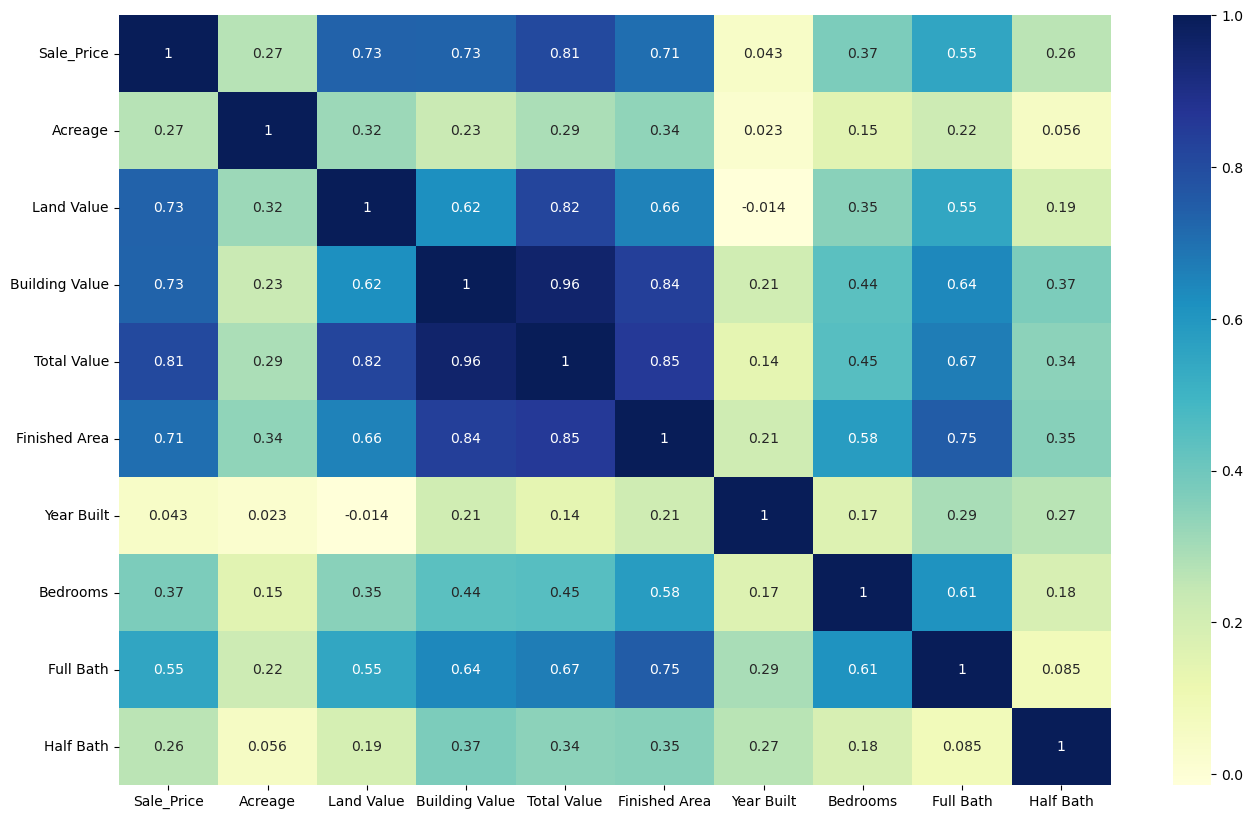

In [52]:
df_train_subset = df_train[['Sale_Price', 'Acreage', 'Land Value', 'Building Value', 'Total Value','Finished Area','Year Built','Bedrooms','Full Bath','Half Bath']]

# Plotting the heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(df_train_subset.corr(), annot = True, cmap="YlGnBu")
plt.show()